## Los Angeles AirBnb listings Analysis

## Note:

### The CSV files that are read in this document are the result of the code ran on EMR , which is placed in this same direcoty as python file and ipynb file with name  listing_analysis_emr


In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
sns.set_style("darkgrid")
%matplotlib inline

In [2]:
root_folder = "../processed_data/listing_data/"

room_type_count = root_folder+ "room_type_count_1.csv"
property_type_count = root_folder+ "property_type_count_2.csv"
property_room_avg_price = root_folder+"property_room_avg_price_3.csv"
avg_room_price = root_folder+ "avg_room_price_4.csv"
neighbourhood_lists = root_folder+ "neighbourhood_lists_5.csv"
neighbourhood_price = root_folder+ "neighbourhood_price_6.csv"
cleaned_data_with_new_score = root_folder+"cleaned_data_with_new_score_7.csv"

## Part 1.Which type of property and location to invest in AirBnB Los Angeles to earn more?

#### To analyse for above question lets break the problem in to following smaller questions

## What is the share of differnet room types?

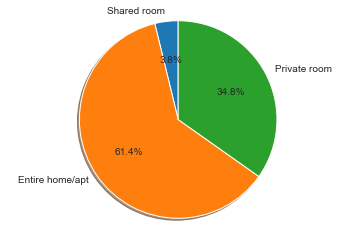

In [6]:
room_type_count_df = pd.read_csv(room_type_count)
fig1, ax1 = plt.subplots()
ax1.pie(room_type_count_df['number_of_listings'], labels=room_type_count_df['room_type'] ,autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()



It is clear that Los Angeles airbnb listings data contain higher percentage of room_type Entire Home or Aparment, next higher percentage is of room_type private rooms.<br>
Very less percentage of shared rooms available. That means people are more inclined to choose airbnb property that has entire home/apartment. 

### What are the various property types listed in AirBnb Los Angeles and how many?

Text(0.5, 0, 'Property Type')

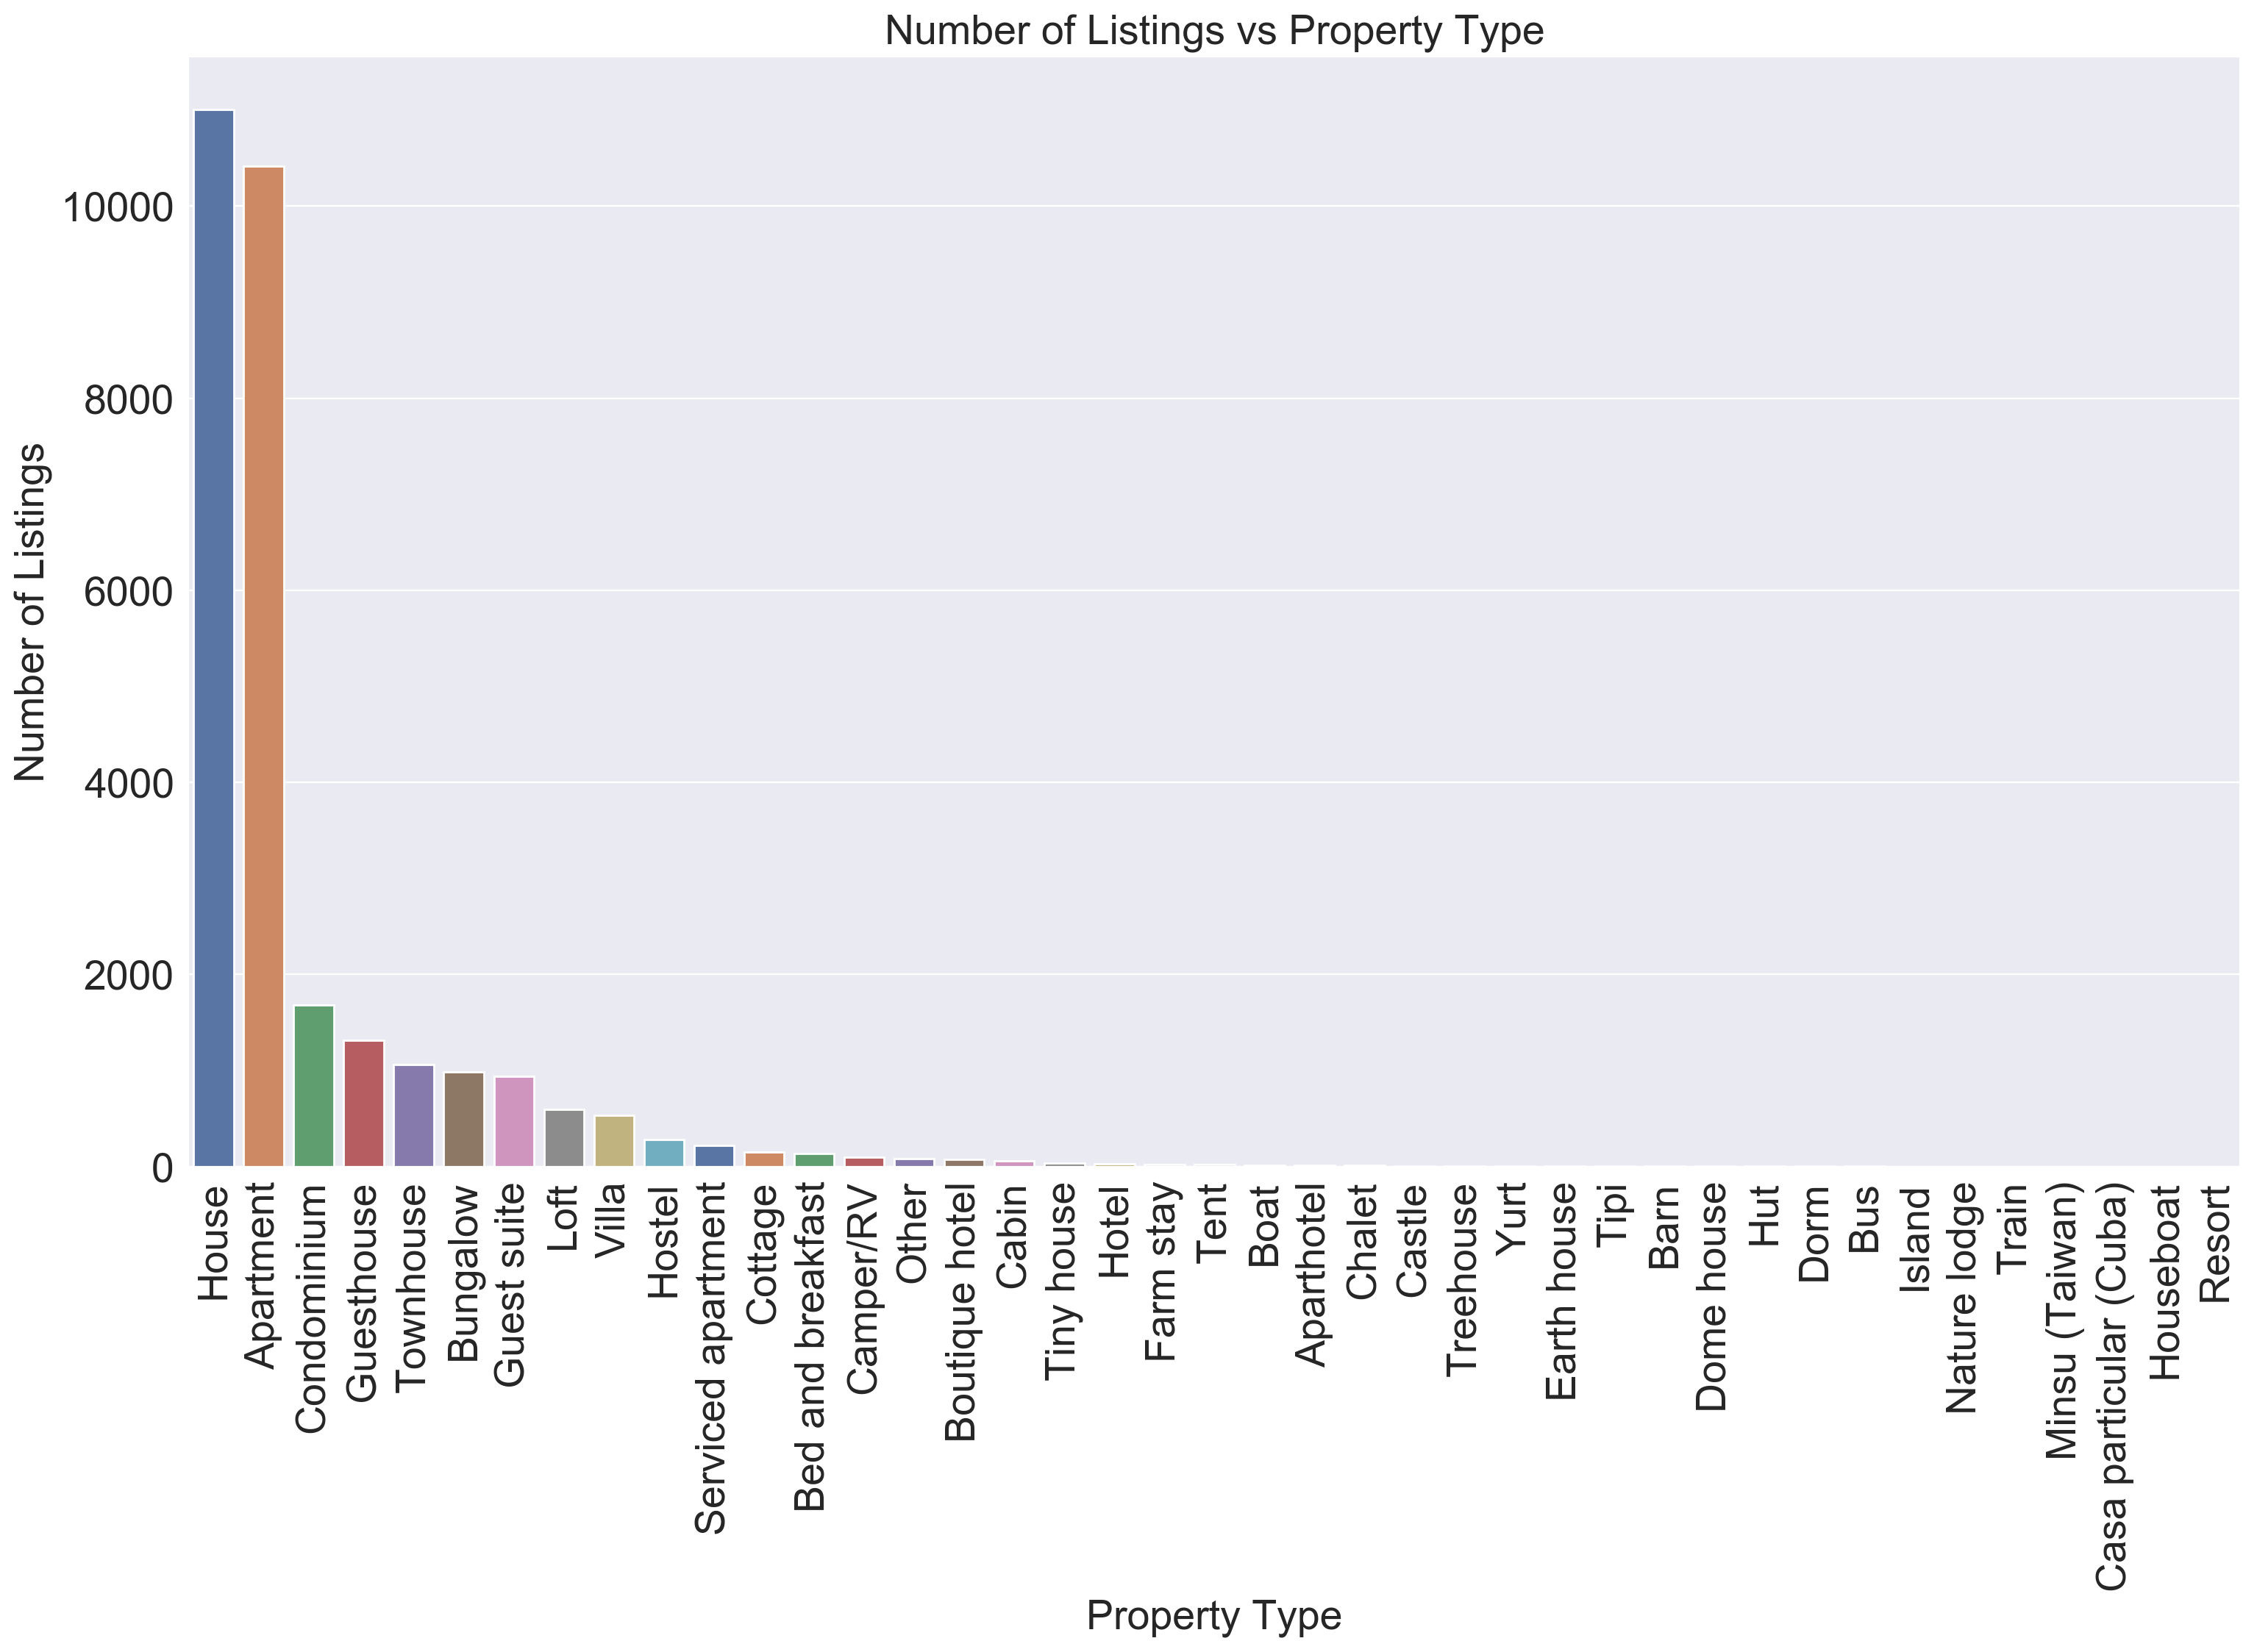

In [8]:
property_type_count_df = pd.read_csv(property_type_count)
property_type_count_df = property_type_count_df.sort_values(by=['number_of_listings'], ascending=False)


x_objects = property_type_count_df['property_type']
y_objects = property_type_count_df['number_of_listings']

plt.figure(figsize=(18,10), dpi=200) 
ax = sns.barplot(x= x_objects, y= y_objects, palette="deep")
ax.tick_params(labelsize=20)
plt.xticks(rotation=90)
plt.title("Number of Listings vs Property Type",fontsize=20)
plt.ylabel('Number of Listings',fontsize=20)
plt.xlabel('Property Type',fontsize=20)

From the above chart it can be seen that majority of the listings is of Home and Apartments. People like to take entire House or Apartment rather than going towards other property types.This means property type is an important factor when we consider investing in AirBnB.

### How the listing price vary between room type and property type ?

Text(0.5, 88.0, 'Room Type')

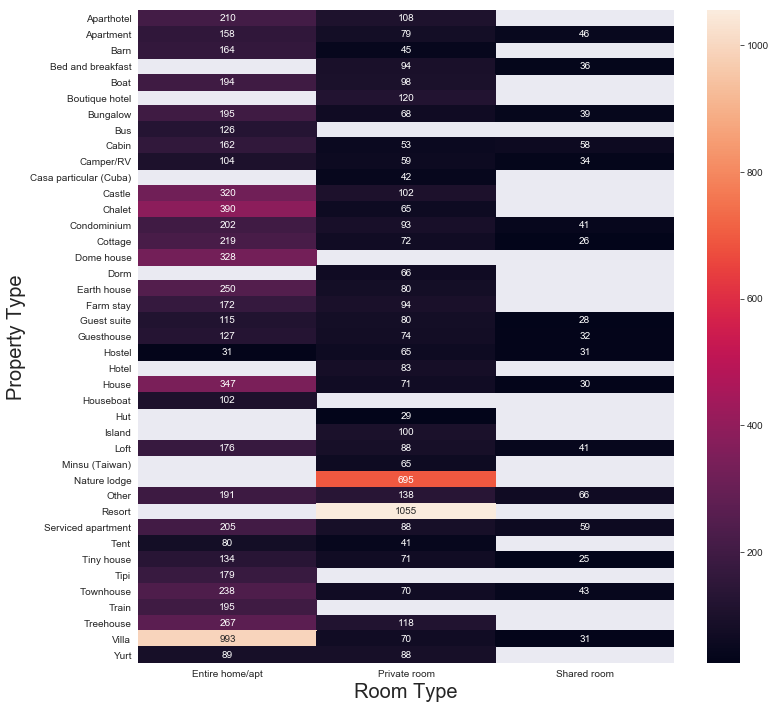

In [12]:
property_room_avg_price_df = pd.read_csv(property_room_avg_price)

property_room_avg_price_df
plt.figure(figsize=(12,12))
ax = sns.heatmap(property_room_avg_price_df.groupby(['property_type', 'room_type']).average_price.mean().unstack(),annot=True, fmt=".0f")


plt.ylabel('Property Type',fontsize=20)
plt.xlabel('Room Type',fontsize=20)


This Heat map shows how the prices vary with room type and property type. It is seen that villa with Entire room/apt and Resort with private rooms are high in number among all of others. We can see that considering all the listing Entire home/apt and Private room are listed high or above average. 

### What is the average price of different room types available in Las Angeles AirBnb

Text(0.5, 0, 'Room Type')

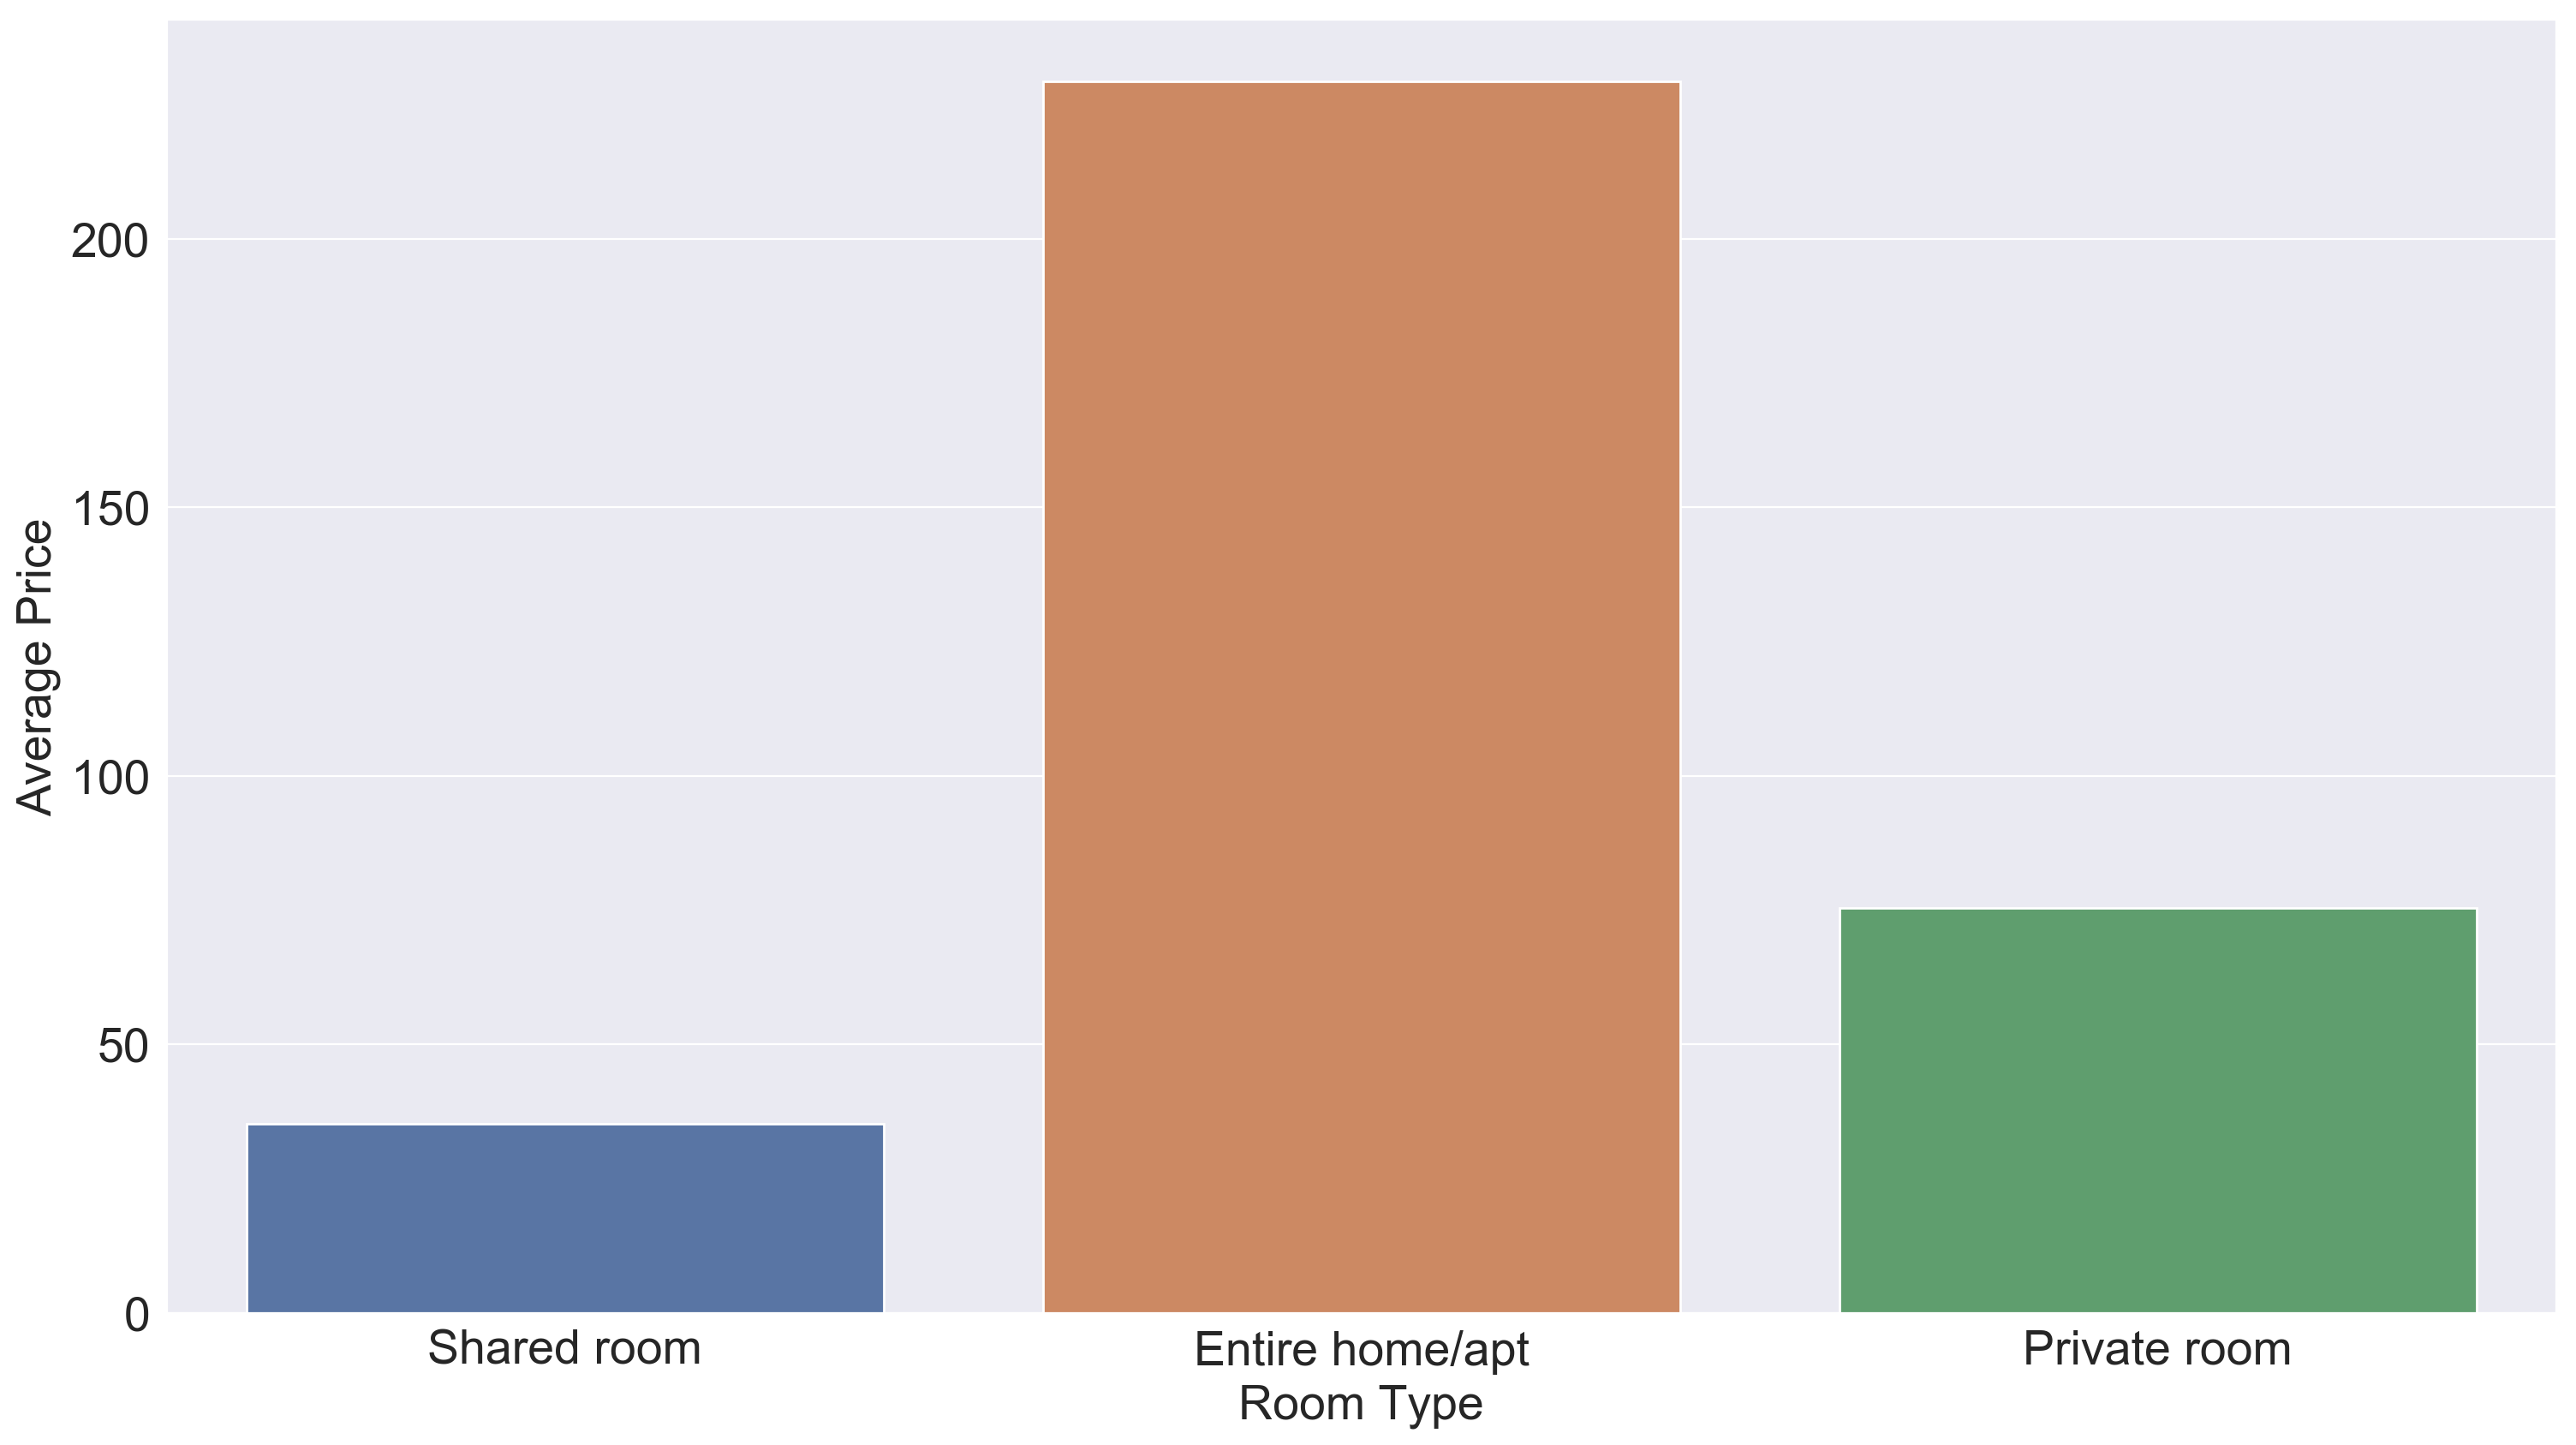

In [13]:
avg_room_price_df = pd.read_csv(avg_room_price)

x_objects = avg_room_price_df['room_type']
y_objects = avg_room_price_df['average_price']

plt.figure(figsize=(18,10), dpi=200) 
ax = sns.barplot(x= x_objects, y= y_objects, palette="deep")
ax.tick_params(labelsize=20)
plt.ylabel('Average Price',fontsize=20)
plt.xlabel('Room Type',fontsize=20)

By comparing the average prices of different room type we can again see that room_type Entire Home/Apt has an average price of $250. Second is private rooms and Shared rooms are listed least among them.

## Now we extract data for room_type as Entire Home/Apartment to analyze for how neighbourhoods influence the price and number of listings

### Total number of listings in different neighbourhoods of Los Angeles

Text(0.5, 0, 'Neighbourhood')

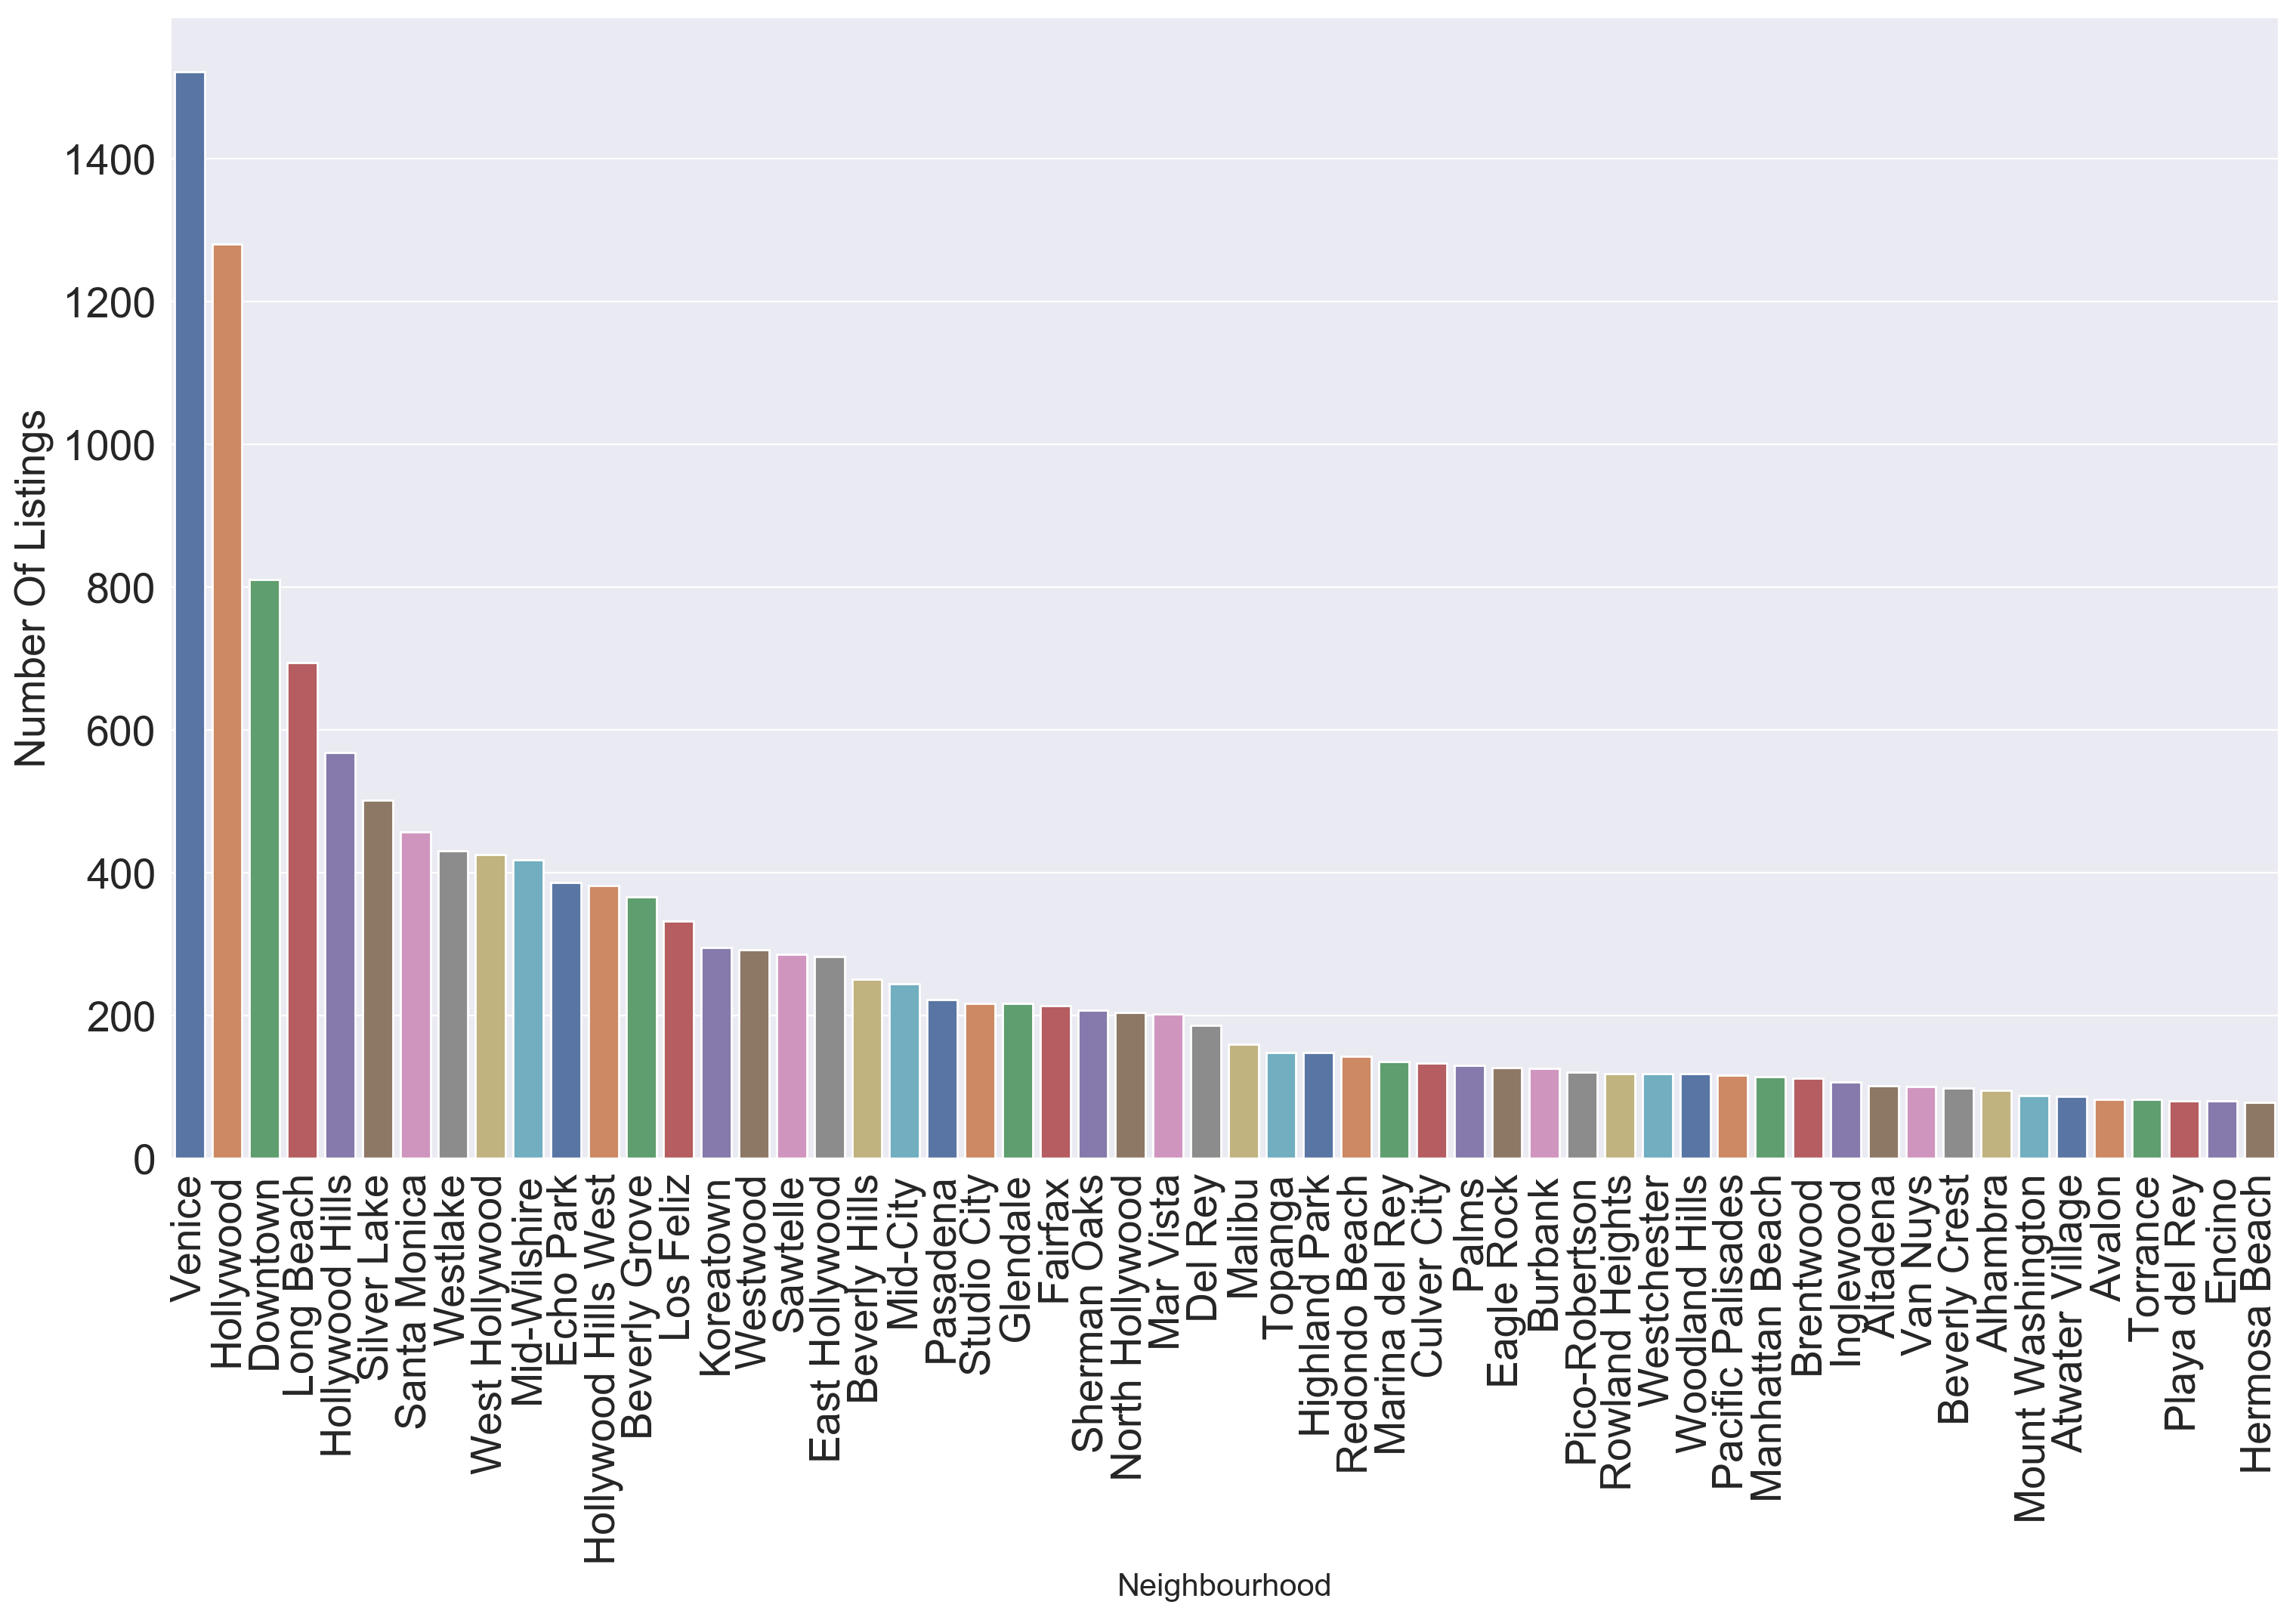

In [16]:
neighbourhood_lists_df = pd.read_csv(neighbourhood_lists)

x_objects = neighbourhood_lists_df['neighbourhood_cleansed']
y_objects = neighbourhood_lists_df['number_of_lists']

plt.figure(figsize=(18,10), dpi=200) 
ax = sns.barplot(x= x_objects, y= y_objects, palette="deep")
plt.xticks(rotation=90)
ax.tick_params(labelsize=20)
plt.ylabel('Number Of Listings',fontsize=20)
plt.xlabel('Neighbourhood',fontsize=15)

It can be visualized from the graph that total number of lists of Entire Home/Apt are in locations like Venice, Hollywood and Downtown. So more listings are located at the center of Los Angeles when  compared to other locations.

### How the price of AirBnb listings vary based on the neighbourhood

Text(0.5, 0, 'Neighbourhood')

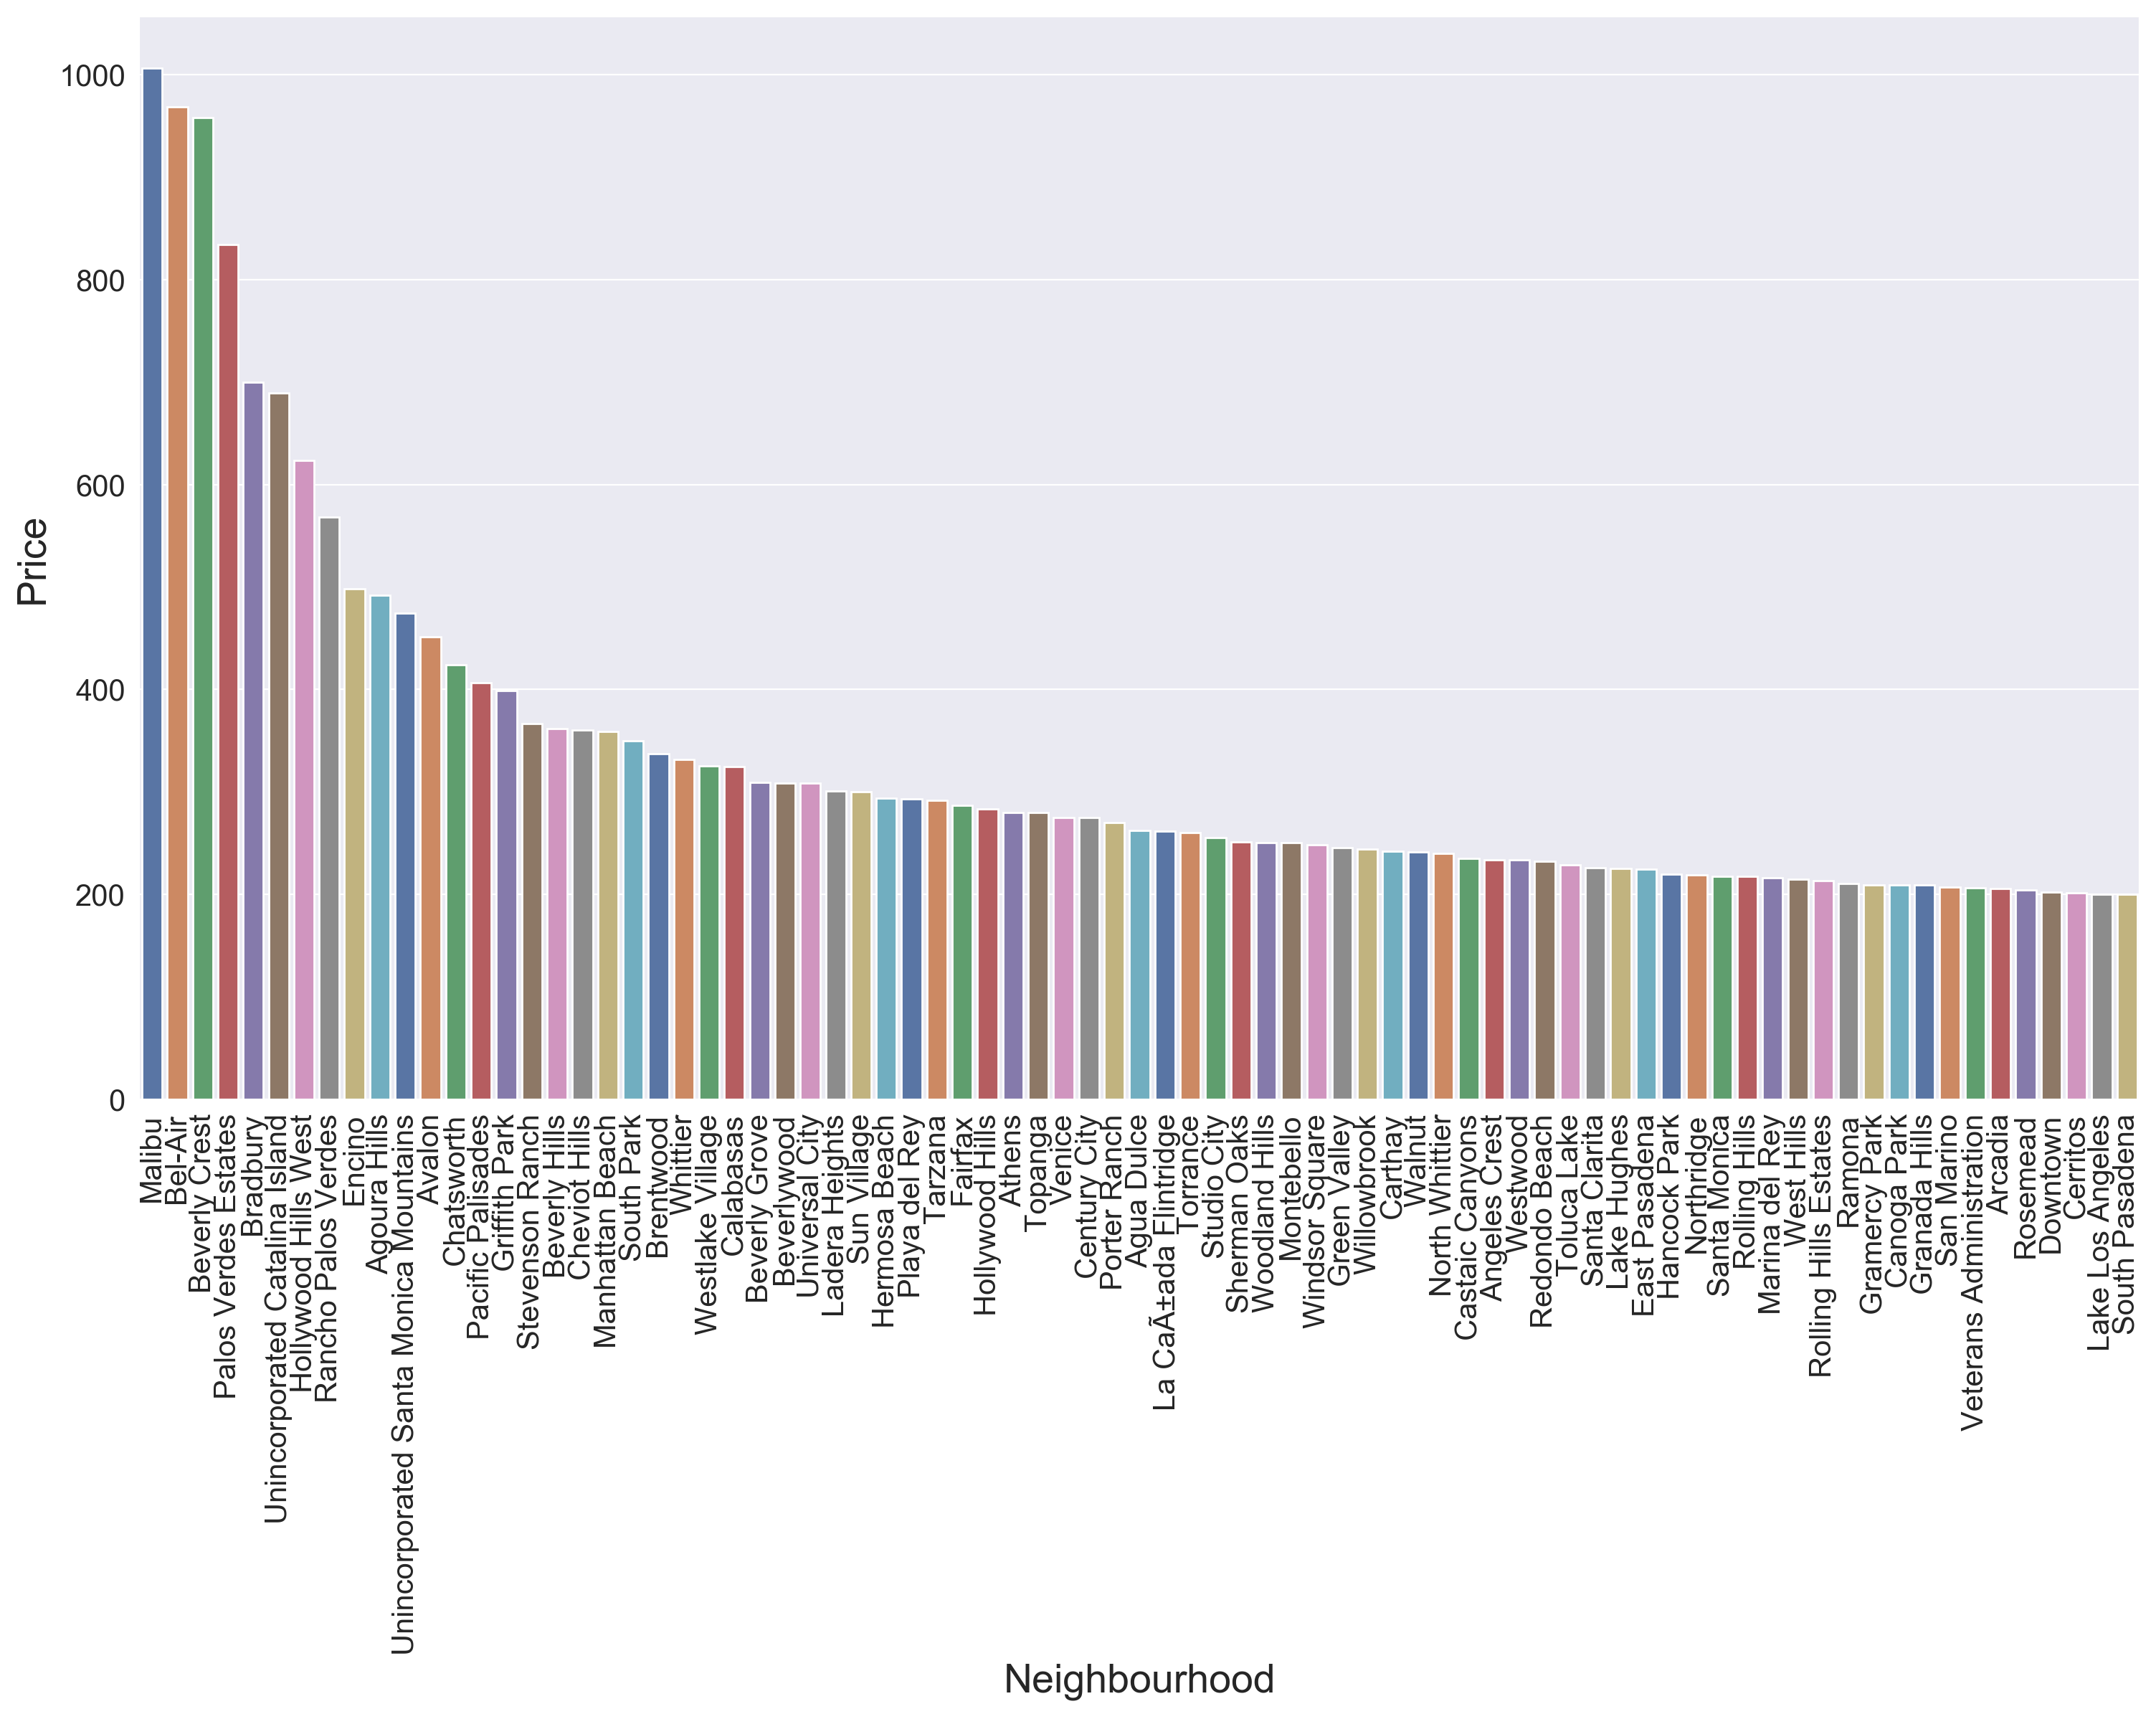

In [32]:
neighbourhood_price_df = pd.read_csv(neighbourhood_price)

x_objects = neighbourhood_price_df['neighbourhood_cleansed']
y_objects = neighbourhood_price_df['price']

plt.figure(figsize=(18,10), dpi=200) 
ax = sns.barplot(x= x_objects, y= y_objects, palette="deep")
plt.xticks(rotation=90)
ax.tick_params(labelsize=15)
plt.ylabel('Price',fontsize=20)
plt.xlabel('Neighbourhood',fontsize=20)

Prices of Entire Home/Apt in Neighbourhoods like Malibu, Bel-Air and Beverly Crest are listed high among others.<br>
Houses in Malibu are listed highest price, but number of listings is less. Similarly number of houses in Venice is more but its price is less.<br>
From this we can conclude that if the number of listings is more in a location, the rent for houses will be in competitive price.

So from the above analysis we can conclude that costs of listings in AirBnB relies on Room Type, Property Type and neighbourhood.<br>
Its is also evident that properties with Entire Home or Apartment and Private rooms has more pricier when compared to others. Based on the neighbourhood and total available listings in that place the prices vary.<br>

### Conclusions:
1. The type of rooms choosen by customer is more likey to be Entire House/Apartment followed by private room and then shared room.
2. Considering the propety types Apartment and Houses are more likely to be choosen by customers.
3. neighbourhood and availability of other property listings in the neighbourhood plays an important factor in deciding the price of the House.
4. For investment purpose, one can earn more if he invests in Entire House/Apartment in locations like Malibu, Venice, Downtown, Hollywood

## Part 2.  What is the difference between top performer and Low Performer we can infer from the data?

To see the difference between the top performer and low performer we will be doing feature comparision of top performer and low performer.

Comparision is done based on <b>reviews per month</b>  and <b>review score rating</b> given in the data set.

We will be creating a new column called <b>new_review_score</b> whose value equal to <b>reviews per month</b> * <b>review score rating</b>. 

This score is used to divide the list into top performer and low performer.

The lists whose percentile of <b>new_review_score</b> is greater than 90 will be categorized as top performer and the lists whose percentile of <b>new_review_score</b> is lesser than 25 will be considered as low performer.

In [20]:
listing_df = pd.read_csv(cleaned_data_with_new_score)

Calculate correlation of <b>new_review_score</b> with other features in the dataset.

In [21]:
corrlation_df =listing_df.corr().unstack().sort_values(ascending=False)
print('Correlation of the new_score against all other')
print(corrlation_df['new_review_score'][1:-1])

Correlation of the new_score against all other
host_response_rate        0.323906
host_is_superhost         0.301354
instant_bookable          0.239804
guests_included           0.038082
accommodates              0.037591
host_has_profile_pic      0.005601
beds                     -0.012329
extra_people             -0.038830
bedrooms                 -0.067653
price                    -0.090577
bathrooms                -0.096040
host_identity_verified   -0.118828
security_deposit         -0.124186
cleaning_fee             -0.131263
dtype: float64


#### Based on the correlation score, we will be taking the host_response_rate, host_is_superhost, instant_bookable features to compare features of low and high performer.

Dividing the list into top performer and low performer

In [22]:
low_performing_listing = listing_df[listing_df['new_review_score'] <= np.percentile(listing_df['new_review_score'],25)]
top_performing_listing = listing_df[listing_df['new_review_score'] >= np.percentile(listing_df['new_review_score'],90)]


Data preprocessing on cleaned data

In [23]:
# host_response_rate

host_responserate_top = pd.DataFrame(top_performing_listing['host_response_rate'].reset_index(drop = True))
host_responserate_top['status'] = 'Top Performer'

host_responserate_low = pd.DataFrame(low_performing_listing['host_response_rate'].reset_index(drop = True))
host_responserate_low['status'] = 'Low Performer'

host_responserate = host_responserate_top.append(host_responserate_low).sample(frac=1)
host_responserate

percentage_low = list(host_responserate[host_responserate['status'] == 'Low Performer']['host_response_rate'].unique())
percentage_low.sort(reverse = True)
percentage_top = list(host_responserate[host_responserate['status'] == 'Top Performer']['host_response_rate'].unique())
percentage_top.sort(reverse = True)
host_responserate_list = host_responserate[host_responserate['host_response_rate'].isin([1.0, 0.99, 0.96, 0.95,0.94,0.93,0.92,0.91,0.90, 0.0])]


# host_is_superhost 

host_is_superhost_top = pd.DataFrame(top_performing_listing['host_is_superhost'].reset_index(drop = True))
host_is_superhost_top['status'] = 'Top Performer'

host_is_superhost_low = pd.DataFrame(low_performing_listing['host_is_superhost'].reset_index(drop = True))
host_is_superhost_low['status'] = 'Low Performer'

host_is_superhost = host_is_superhost_low.append(host_is_superhost_top)


# instant_bookable   

instant_bookable_top = pd.DataFrame(top_performing_listing['instant_bookable'].reset_index(drop = True))
instant_bookable_top['status'] = 'Top Performer'

instant_bookable_low = pd.DataFrame(low_performing_listing['instant_bookable'].reset_index(drop = True))
instant_bookable_low['status'] = 'Low Performer'

instant_bookable = instant_bookable_low.append(instant_bookable_top)


Text(0.5, 0, 'Host Response Rate')

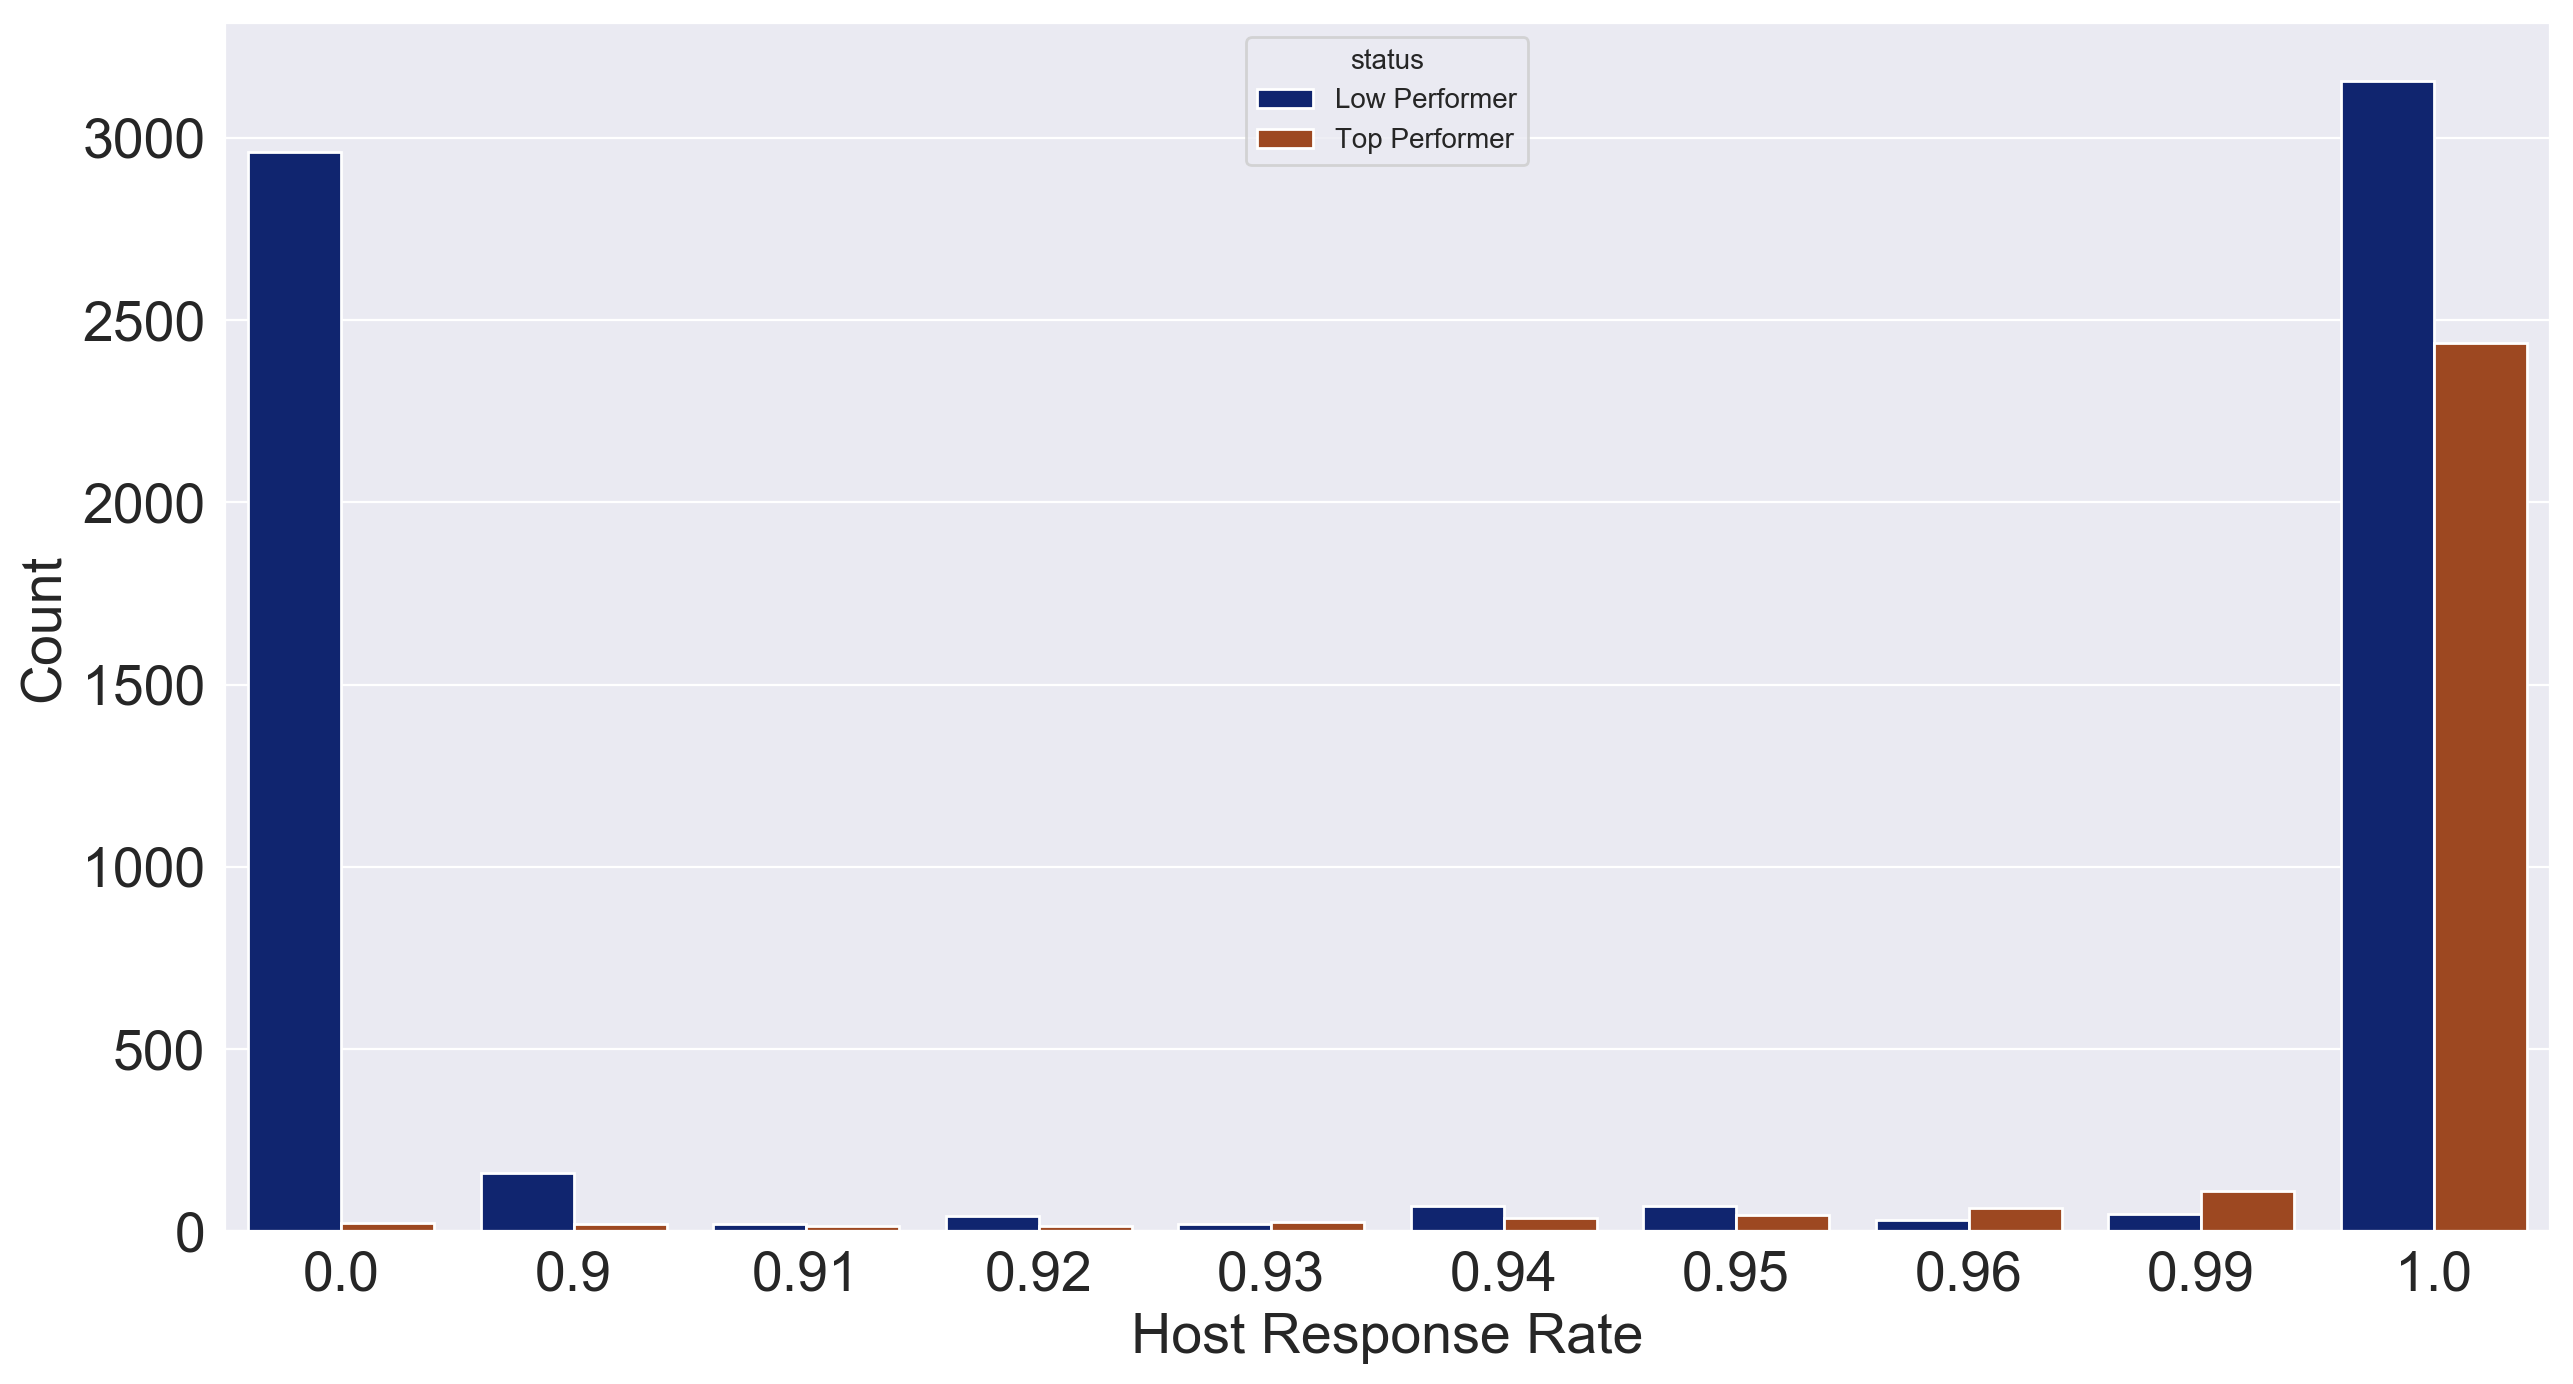

In [24]:
plt.figure(figsize=(15,8), dpi=200) 
ax = sns.countplot(x="host_response_rate", hue='status', data=host_responserate_list, palette='dark', orient='h')
ax.tick_params(labelsize=20)
plt.ylabel('Count',fontsize=20)
plt.xlabel('Host Response Rate',fontsize=20)

#### Host response rate
* host response rate of more than 80% of Top performers  was almost 100%
* Eventhough there is a large percentage of low performers with response rate 100%, there are also 99% of low performers who have host response rate 0%. 

Text(0.5, 0, 'Host Is Super Host')

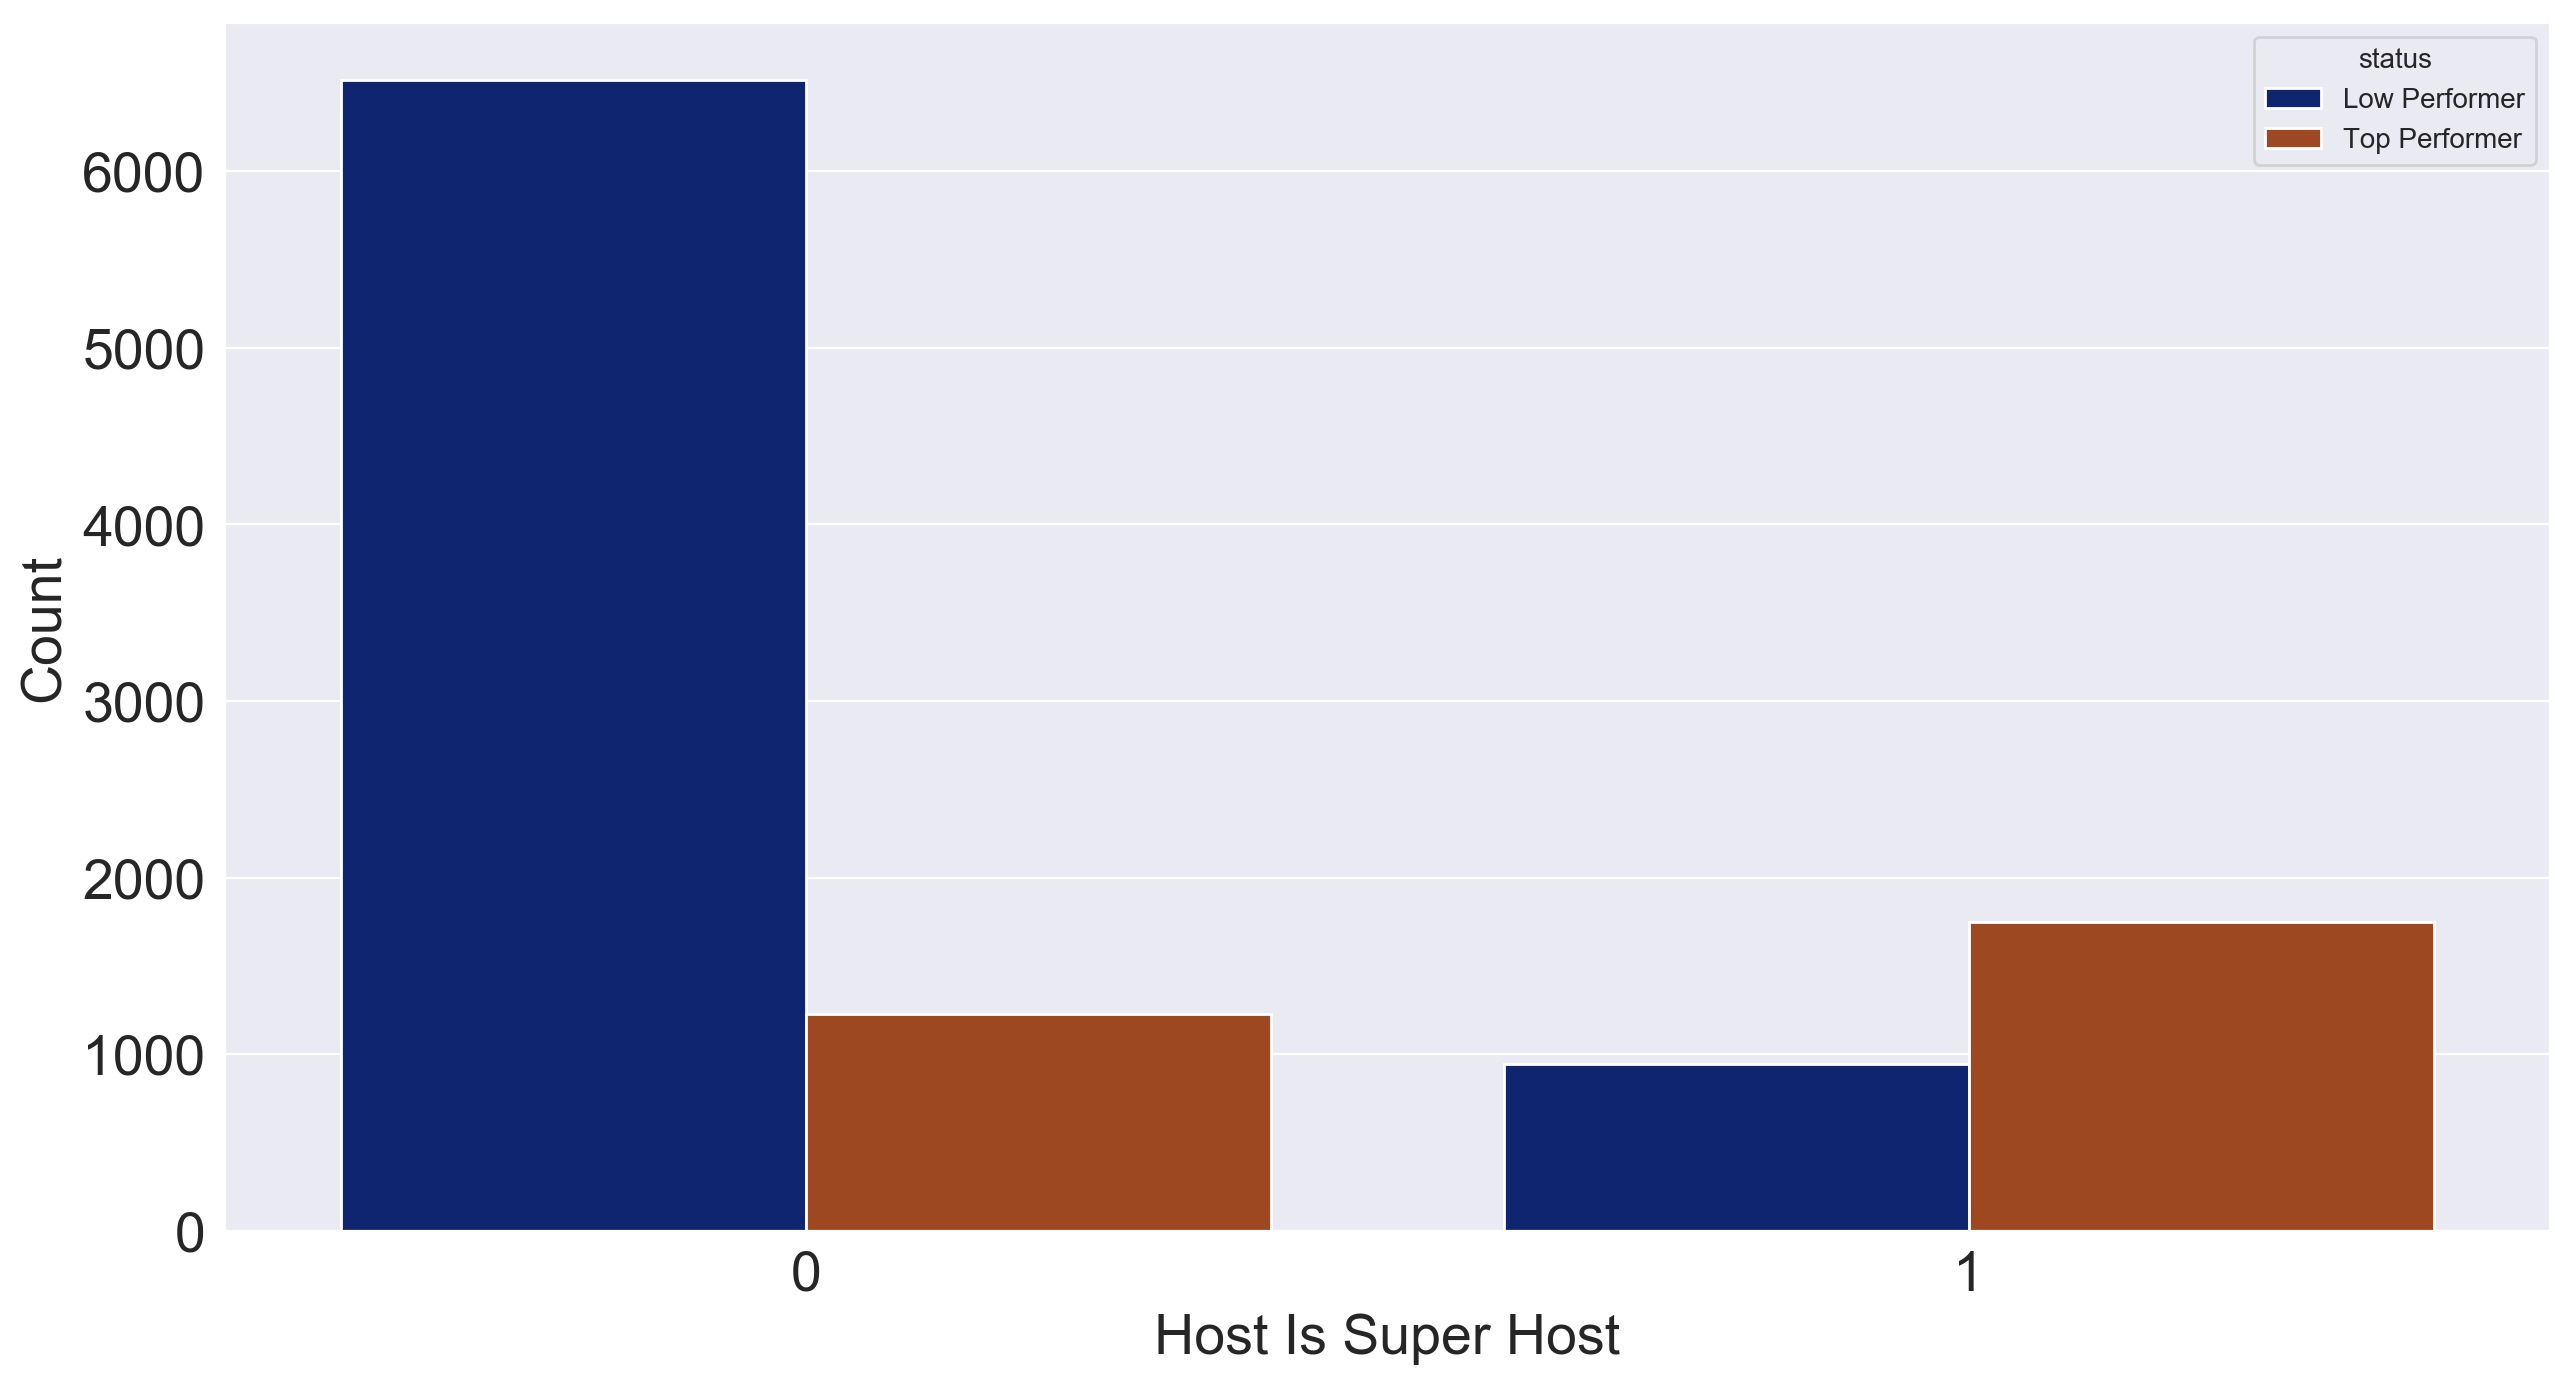

In [25]:
plt.figure(figsize=(15,8), dpi=200) 
ax = sns.countplot(x="host_is_superhost", hue='status', data=host_is_superhost, palette='dark', orient='h')
ax.tick_params(labelsize=20)
plt.ylabel('Count',fontsize=20)
plt.xlabel('Host Is Super Host',fontsize=20)

### Host is superhost
* Its evident from the graph that 30%+ top performers are super hosts
* Major part of low performers are not super host.

Text(0.5, 0, 'Instant Bookable')

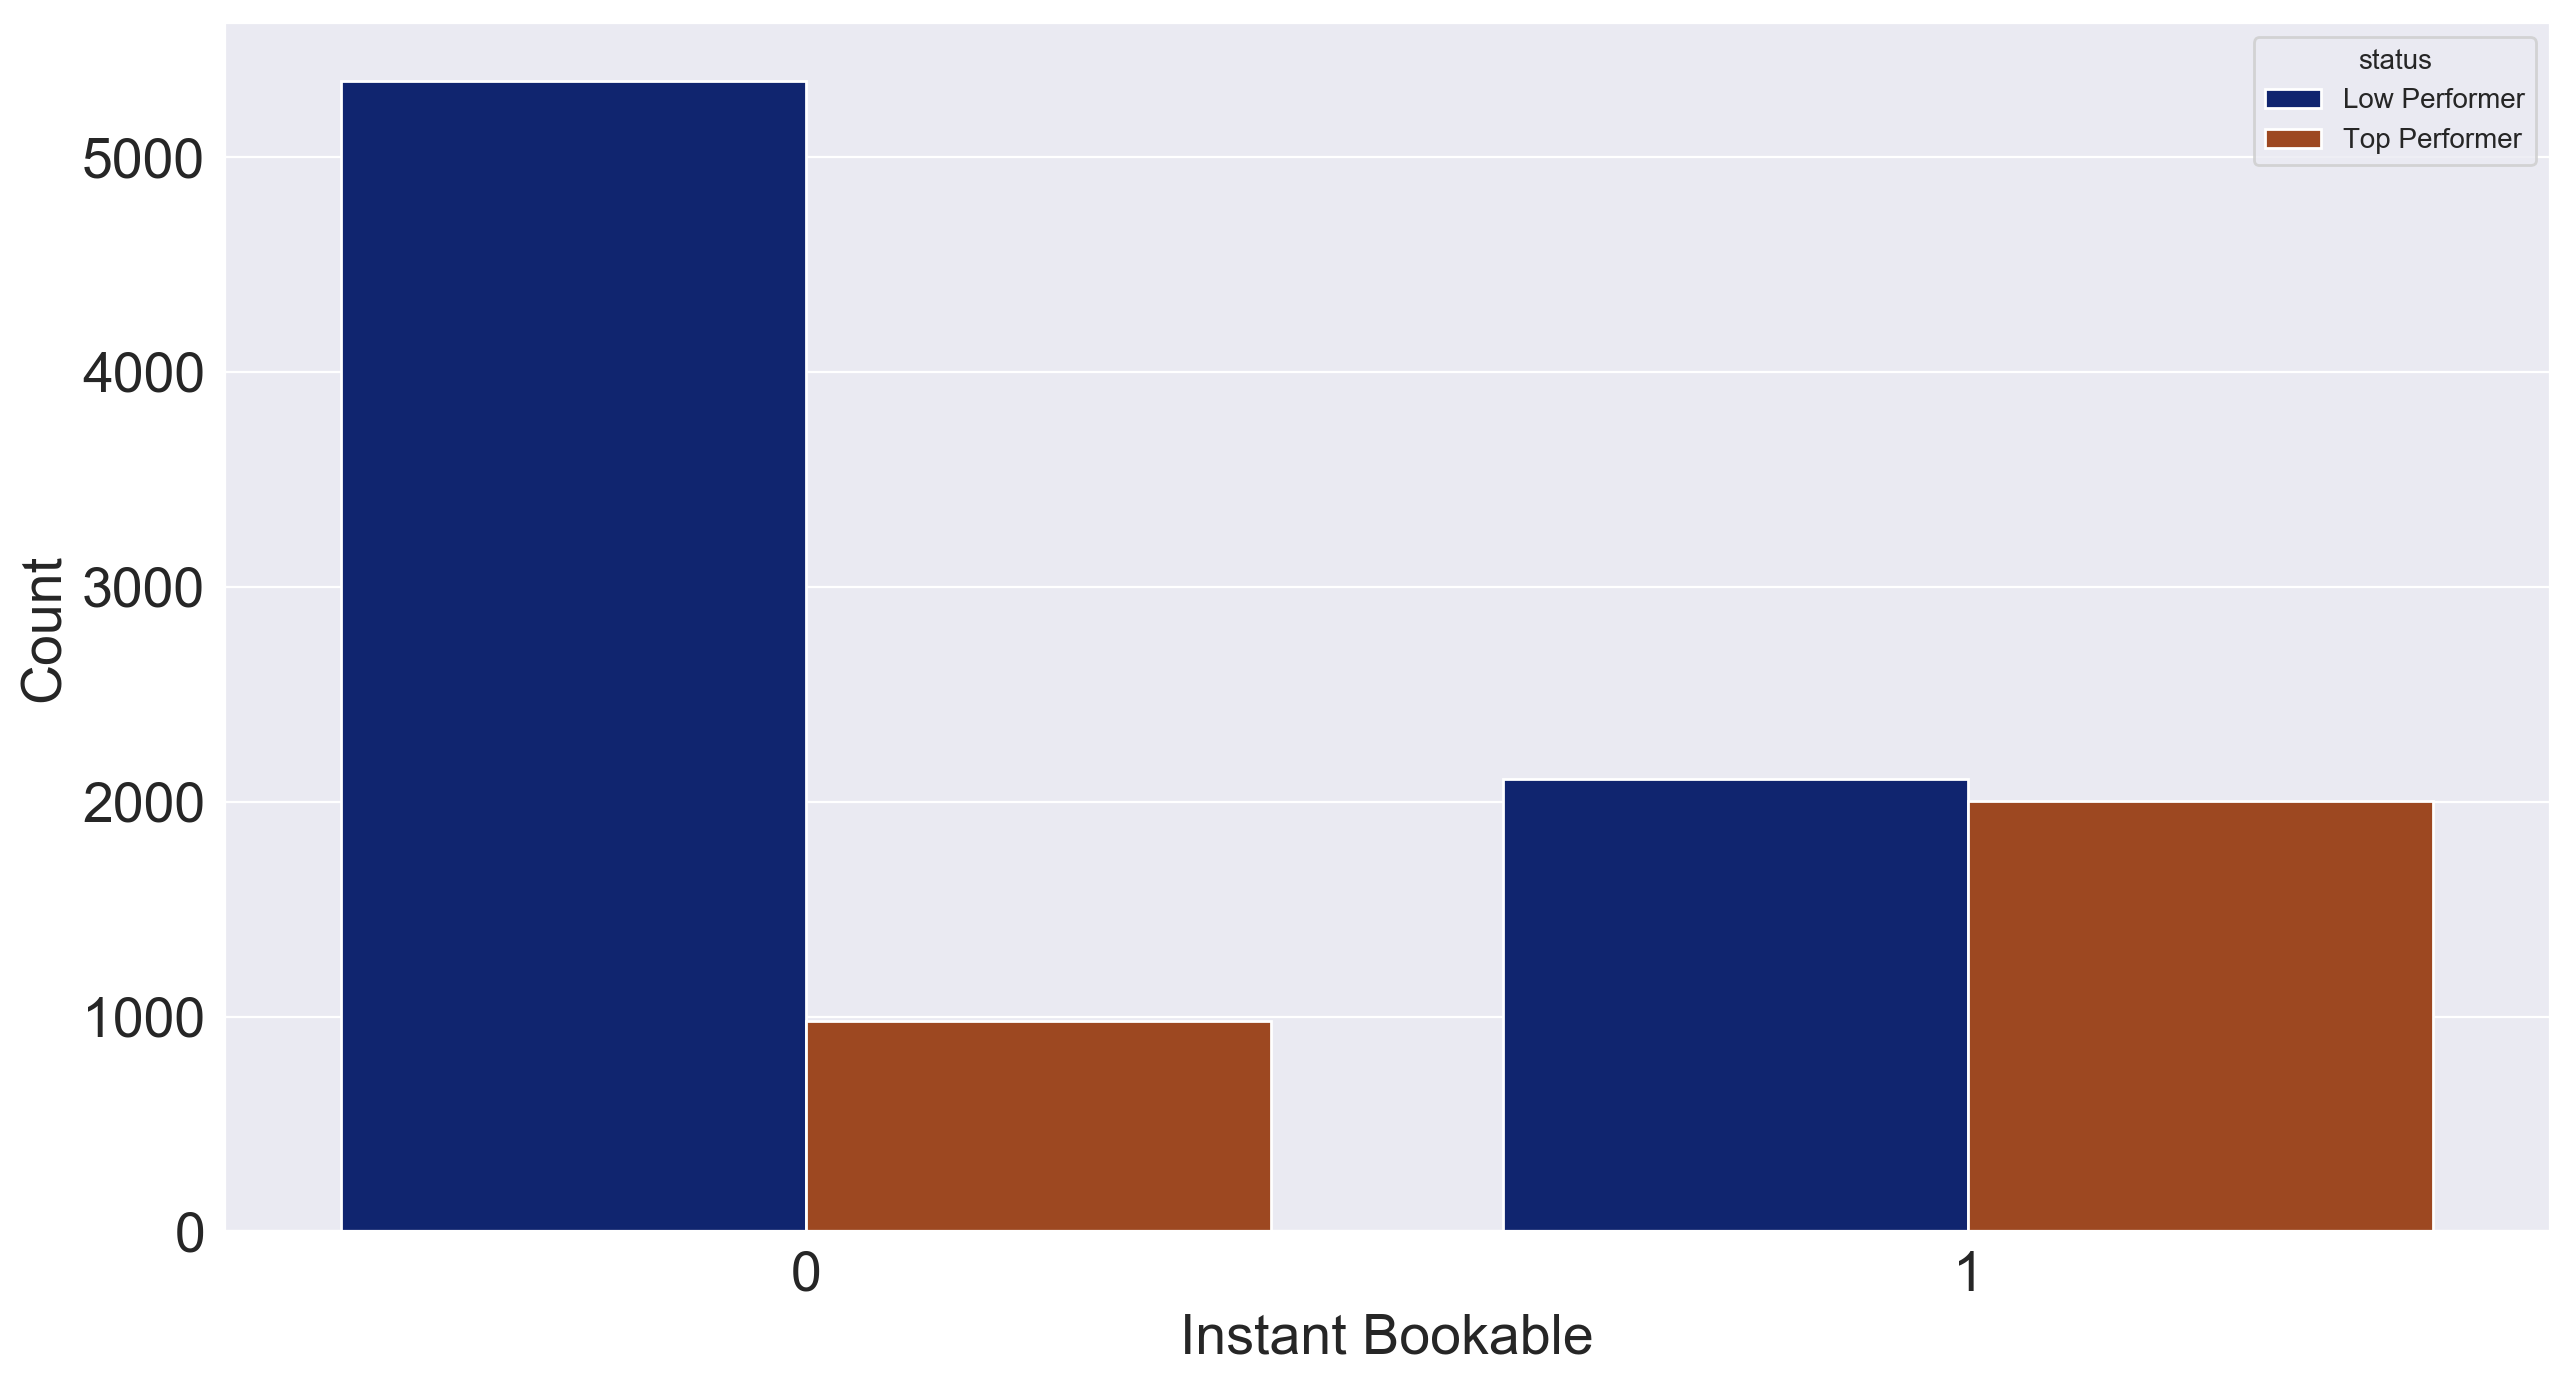

In [26]:
plt.figure(figsize=(15,8), dpi=200) 
ax = sns.countplot(x="instant_bookable", hue='status', data=instant_bookable, palette='dark', orient='h')
ax.tick_params(labelsize=20)
plt.ylabel('Count',fontsize=20)
plt.xlabel('Instant Bookable',fontsize=20)

### Instant Bookable
* Around 40% of Top performers have instant booking facility
* Major number of low performers don't have instant booking faciclity

### Conclusion: suggestion to become top perfomer
* Give instant booking facility to cusotmers, that would bring more customers who make last minute plans in this busy life.
* Try to be recognised by AirBnb as superhost 
* Be more responsive to the customers